In [ ]:
%matplotlib inline


# Demo of OPTICS clustering algorithm

.. currentmodule:: sklearn

Finds core samples of high density and expands clusters from them.
This example uses data that is generated so that the clusters have
different densities.
The :class:`~cluster.OPTICS` is first used with its Xi cluster detection
method, and then setting specific thresholds on the reachability, which
corresponds to :class:`~cluster.DBSCAN`. We can see that the different
clusters of OPTICS's Xi method can be recovered with different choices of
thresholds in DBSCAN.


In [1]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import sklearn.utils
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler

# data
X = np.array([[52.483,66.284,54.34,74.122],[38.723,56.632,73.847,71.112],[50.087,72.299,80,70.159],[35.037,67.925,82.998,72.199],[42.699,94.815,75.541,74.806],[43.859,96.531,59.302,75.651],[42.106,100.471,104.103,70.244],[46.266,68.777,78.582,61.783],[44.514,64.179,75.79,50.429],[40.28,84.297,97.216,71.2],[42.313,81.127,87.273,65.455],[39.634,85.715,53.582,69.173],[42.121,68.809,108.17,72.986],[44.138,87.419,78.905,64],[53.458,55.12,73.181,69.785],[33.75,61.115,87.538,69.398],[38.689,78.55,71.112,65.455],[40.393,81.46,63.034,67.59],[40.794,66.752,62.352,73.639],[41.685,53.458,93.568,69.256],[41.38,74.525,87.605,65.107],[36.266,46.956,61.883,64.495],[46.452,65.544,55.183,64.43],[41.291,58.644,52.089,68.061],[37.709,50.232,68.925,59.795],[41.058,63.124,89.013,69.574],[41.143,77.42,57.411,69.963],[41.241,77.838,81.414,73.023],[34.804,79.779,83.31,69.641],[33.817,59.69,83.346,70.91],[30.052,68.662,65.041,67.997],[59.181,66.845,81.127,67.149],[25.563,78.905,50.527,64.502],[40.342,64,96,68.198],[41.697,61.717,93.507,58.478],[42.51,55.923,63.228,66.003],[40.28,78.905,91.125,75.088],[42.158,71.332,91.068,65.904],[44.421,59.69,51.246,65.455],[35.146,67.173,53.054,61.277],[39.643,75.196,60.126,68.013],[39.23,77.316,55.385,60.057],[35.512,68.654,55.486,67.408],[34.033,103.467,66.207,64.236],[42.397,68.247,84.794,70.736],[38.113,47.447,69.759,58.956],[42.478,90.17,82.676,66.018],[40.82,73.283,72.709,69.123],[42.842,84.706,73.979,58.036],[32.728,50.381,83.022,59.721],[45.416,82.676,76.8,69.398],[32.239,40,106.667,72.517],[50.527,62.338,56.844,65.137],[34.354,100,93.659,65.957],[39.453,69.19,90.353,70.125],[51.892,85.971,104.728,75.93],[40.28,85.971,92.904,65.455],[48.678,84.396,85.422,69.29],[41.559,50.897,91.068,75.295],[43.472,65.582,98.749,55.766],[49.316,69.566,97.628,68.9],[42.456,60.107,101.498,76.191],[48.769,88.616,89.65,66.018],[46.561,63.528,98.817,71.66],[41.791,76.12,102.858,73.339],[37.437,99.879,101.409,76.08],[40.28,104.728,84.706,70.065],[35.275,78.905,92.412,76.944],[42.547,83.479,88.344,72.453],[35.721,87.273,92.531,60.315],[40,35.052,75,68.983],[43.746,79.263,73.536,66.783],[43.273,72.609,85.971,63.096],[48.449,55.874,87.499,68.809],[36.389,99.879,65.211,68.572],[38.619,73.847,101.053,59.302],[40.765,61.277,68.304,72.299],[40.852,79.636,106.667,70.84],[41.87,82.286,57.503,59.69],[43.923,80.82,94.427,73.32],[34.142,66.337,93.235,69.181],[35.556,50.674,70.073,53.557],[44.376,82.522,101.947,67.67],[35.501,87.712,49.11,68.752],[40.658,88.168,69.398,45.266],[41.61,45,51.2,66.59],[36.293,48.711,62.46,60.914],[36.17,90.467,79.449,70.823],[34.321,95.729,91.867,67.204],[31.93,51.315,90.353,73.32],[43.202,63.437,87.805,65.455],[41.312,81.61,58.83,66.124],[38.4,64.72,63.696,63.844],[39.953,68.433,86.617,72.326],[39.804,84.211,86.839,52.326],[50.974,66.977,53.984,52.738],[22.465,96.322,80.752,67.845],[43.221,88.616,58.083,75.069],[49.387,69.963,78.592,60.069],[34.315,84.495,84.458,67.032],[46.018,76.04,89.303,67.63],[46.667,75.79,70.494,64.459],[37.845,97.216,73.489,48.889],[39.725,76.975,68.029,59.733],[42.391,52.724,97.216,71.678],[47.671,71.642,100.035,64.625],[41.49,51.178,89.874,71.173],[36.475,82.795,88.385,58.597],[42.301,82.286,83.153,73.376],[40.28,89.303,75.522,64.807],[46.925,60.283,92.264,62.924],[28.572,52.603,96.467,60],[56.471,37.729,87.102,65.034],[40.507,86.487,78.102,71.041],[41.439,55.385,83.237,62.136],[42.044,57.89,58.33,55.422],[39.006,61.388,94.226,63.717],[32.143,71.848,70.797,64.459],[57.411,67.503,82.286,67.63],[41.407,47.369,53.687,61.16],[36.735,70.615,66.629,68.637],[52.603,61.743,60.22,66.892],[39.407,70.244,97.86,66.444],[30.126,47.568,69.123,71.929],[45.078,61.539,96.434,67.901],[49.656,64.236,108.17,69.148],[39.964,97.628,97.397,55.152],[40.311,53.582,81.703,66.314],[29.806,71.403,90.567,69.963],[43.803,64,95.713,66.721],[34.724,67.606,62.752,64.229],[41.852,74.486,78.07,59.745],[38.255,73.097,83.479,66.977],[37.381,58.377,85.208,75.79],[40.232,53.137,96.161,65.455],[34.56,43.092,94.427,63.089],[39.118,55.923,73.96,71.27],[37.241,75.128,55.242,61.44],[49.231,50.616,93.873,52.038],[40.187,61.44,70.339,69.997],[33.636,47.869,92.904,61.684],[39.407,53.707,90.567,73.302],[35.629,48.897,71.821,66.207],[38.431,92.904,67.63,70.78],[58.776,70.762,82.676,63.619],[35.23,59.077,87.049,68.134],[37.222,69.256,91.574,60.888],[38.209,51.66,89.762,53.005],[28.375,55.653,65.085,64.96],[40.081,51.799,66.721,59.229],[58.182,66.977,73.573,64.193],[33.066,67.267,68.263,63.675],[47.604,59.077,58.182,68.166],[51.986,80.56,75.354,62.304],[43.114,60.632,76.06,71.732],[31.692,58.692,57.217,72.508],[58.579,66.721,72.1,67.259],[39.318,67.678,99.741,67.709],[42.839,52.772,72.912,71.527],[42.532,40.727,62.883,53.707],[36.273,66.207,85.119,67.071],[40.422,59.733,69.098,57.543],[45.355,72,95.682,75.295],[35.844,61.186,94.815,66.977],[59.69,52.269,67.765,62.224],[39.607,61.493,68.247,62.705],[33.807,52.603,77.629,68.793],[49.072,57.411,67.582,66.737],[41.143,46.64,83.99,58.74],[33.009,52.704,89.441,69.717],[46.08,72.912,81.587,32.883],[34.699,69.903,75.502,58.1],[37.689,61.77,97.298,67.941],[40.768,61.063,69.675,67.901],[32.36,52.845,88.507,68.941],[29.313,51.6,96,69.398],[53.918,34.857,90.809,66.498],[32.197,73.611,96.273,65.515],[36.924,58.478,75.462,62.251],[55.385,81.127,69.156,55.869],[49.979,78.635,84.396,64.72],[64.538,68.925,79.58,56.471],[40.939,76.924,90.595,62.862],[37.162,90.353,49.515,66.768],[30.131,66.207,72.912,64.1],[64.481,58.537,60.207,61.883],[40.687,63.528,62.385,66.667],[42.158,55.923,93.31,63.096],[33.6,67.133,70.823,61.231],[39.937,59.609,79.013,59.047],[45.835,73.536,91.429,66.36],[46.998,69.819,73.255,62.903],[53.958,65.671,83.588,59.548],[34.245,57.411,67.606,66.459],[38.298,60.448,85.019,65.063],[41.709,64.057,80.933,72],[30.902,74.922,82.878,50.974],[39.184,64.72,86.878,68.11],[43.031,50.776,80.526,59.449],[47.447,57.652,85.258,67.709],[56.196,66.337,90,60.69],[37.915,52.898,73.536,65.544],[60.524,61.936,80.369,66.207],[44.105,101.053,92.308,77.057],[56.471,70.433,67.212,68.409],[31.22,60.632,96.807,66.822],[28.657,81.993,82.581,68.482],[40.47,45.355,89.068,67.997],[50.527,65.642,95.682,68.572],[37.771,61.936,74.806,50.638],[39.364,73.442,93.114,72],[39.793,88.168,54.085,58.513],[47.408,57.791,68.368,60.914],[30.546,83.237,47.718,60.076],[40.402,59.017,73.714,59.56],[37.895,96.645,75.89,58.95],[61.115,61.644,85.677,68.433],[37.162,64.509,64.96,67.925],[46.452,74.564,80.843,70.502],[40.056,82.134,71.261,63.922],[53.334,57.699,100.419,73.564],[46.83,103.319,108.968,80.639],[62.951,61.44,89.65,72.199],[38.189,35.556,64.086,66.721]]
)

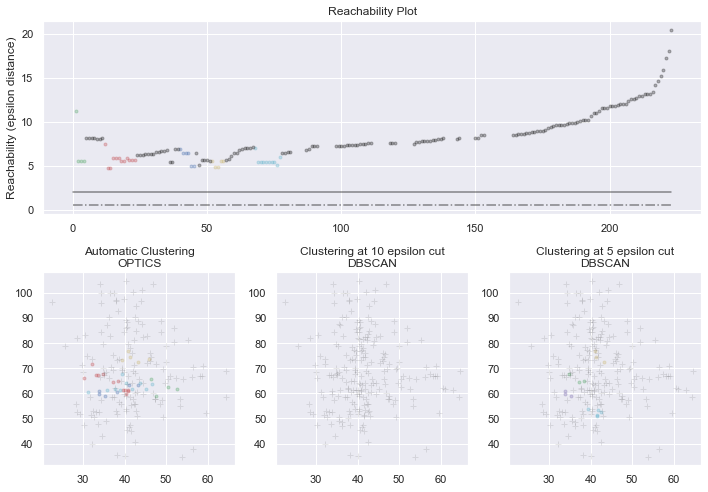

Estimated number of clusters: 12
Estimated number of noise points: 145


In [7]:
clust = OPTICS(min_samples=4)

# Run the fit
clust.fit(X)

labels_7 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=7)
labels_5 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=5)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
#reachability 
labels = clust.labels_[clust.ordering_]

#clust.core_distances_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.5
colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_10 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
ax3.plot(X[labels_10 == -1, 0], X[labels_10 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at 10 epsilon cut\nDBSCAN')

# DBSCAN at 2.
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_5 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_5 == -1, 0], X[labels_5 == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at 5 epsilon cut\nDBSCAN')

plt.tight_layout()
plt.show()

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

In [3]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0, -1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1,  3,  3,  3,
        3,  3,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  4,  4,  4,  4,  4,  4, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])